# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [182]:
import glob
import pandas as pd
import numpy as np

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

states = glob.glob('states*.csv')

df_list = []
for state in states:
    data = pd.read_csv(state)
    df_list.append(data)

us_census = pd.concat(df_list)
print(us_census)

   Unnamed: 0                 State  TotalPop Hispanic   White   Black  \
0           0          Rhode Island   1053661   13.36%  74.33%   5.68%   
1           1        South Carolina   4777576    5.06%  62.89%  28.75%   
2           2          South Dakota    843190    3.24%  82.50%   1.42%   
3           3             Tennessee   6499615    4.72%  73.49%  18.28%   
4           4                 Texas  26538614   38.05%  44.69%  11.65%   
5           5                  Utah   2903379   13.47%  79.41%   1.02%   
0           0                  Utah   2903379   13.47%  79.41%   1.02%   
1           1               Vermont    626604    1.61%  93.98%   0.98%   
2           2              Virginia   8256630    8.01%  63.27%  20.18%   
3           3            Washington   6985464   11.14%  72.04%   3.38%   
4           4         West Virginia   1851420    1.29%  92.18%   3.66%   
5           5             Wisconsin   5742117    6.68%  79.86%   8.20%   
0           0              Maryland   

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [184]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [185]:
print(us_census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [186]:
us_census.Income = pd.to_numeric(us_census.Income.replace('[\$,]', '', regex=True))
print(us_census.Income)
print(us_census.dtypes)


0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
Name: Income, dtype: float64
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [187]:
# print(us_census.GenderPop)

us_census['str_splitted'] = us_census.GenderPop.str.split('_')
# print(us_census['str_splitted'])

us_census['Men'] = us_census['str_splitted'].str.get(0)
us_census['Women'] = us_census['str_splitted'].str.get(1)
# print(us_census.head())
# print(us_census.columns)

us_census = us_census[['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop',
       'Men', 'Women']]
# print(us_census.columns)

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [188]:
us_census.Men = us_census.Men.replace('M', '', regex=True)
us_census.Women = us_census.Women.replace('F', '', regex=True)
# print(us_census.head())

us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

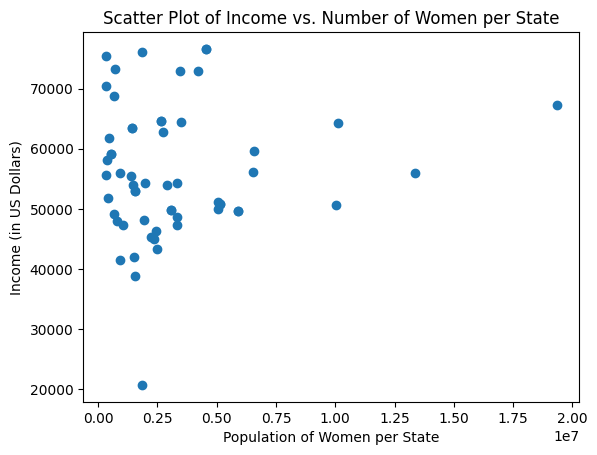

<Figure size 640x480 with 0 Axes>

In [189]:
plt.scatter(us_census.Women, us_census.Income)
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [190]:
# print(us_census['Women'])

us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
print(us_census['Women'])

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [191]:
duplicat = us_census.duplicated(subset = us_census.columns[1:])
print(duplicat)
print(duplicat.value_counts())

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool
False    51
True      9
dtype: int64


11. Drop those duplicates using the `.drop_duplicates()` function.

In [192]:
census = us_census.drop_duplicates(subset = us_census.columns[1:])
print(census.value_counts())

Unnamed: 0  State                 TotalPop  Hispanic  White   Black   Native  Asian   Pacific  Income    GenderPop            Men       Women     
0           Alabama               4830620   3.75%     61.88%  31.25%  0.45%   1.05%   0.03%    43296.36  2341093M_2489527F    2341093   2489527.0     1
4           Indiana               6568645   6.54%     78.43%  11.19%  0.19%   1.58%   0.03%    48616.23  3235263M_3333382F    3235263   3333382.0     1
3           Louisiana             4625253   4.87%     54.98%  36.33%  0.48%   1.67%   0.04%    44957.99  2261156M_2364097F    2261156   2364097.0     1
            Minnesota             5419171   5.15%     81.43%  5.66%   1.07%   4.16%   0.03%    62820.83  2692166M_2727005F    2692166   2727005.0     1
            Nevada                2798636   27.10%    53.24%  7.74%   1.09%   7.10%   0.57%    55526.53  1407735M_1390901F    1407735   1390901.0     1
            North Carolina        9845333   8.46%     64.60%  21.40%  1.09%   2.32%   0.05%  

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

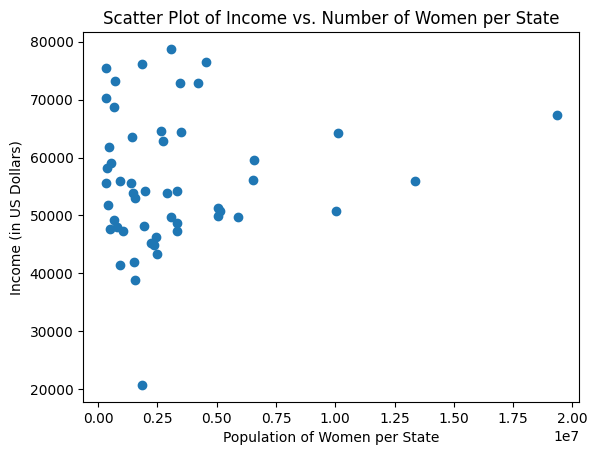

<Figure size 640x480 with 0 Axes>

In [193]:
plt.scatter(census['Women'], census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [194]:
census = us_census[['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women']]
# print(census.columns)
# print(census)
print(census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income       Men       Women  
0  3.25%   0.04%  59125.27    510388    543273.0  
1  1.25%   0.05%  46296.81   2322409   2455167.0  
2  1.02%   0.04%  51805.41    423477    419713.0  
3  1.41%   0.04%  47328.08   3167756   3331859.0  
4  3.67%   0.07%  55874.52  13171316  13367298.0  


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [195]:
list_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for column in list_columns:
    census[column] = census[column].replace('[\%]', '', regex=True)
    census[column] = pd.to_numeric(census[column])
    census[column] = census[column].fillna(census[column].mean())

# print(census.head())
# print(census.dtypes)

# check na in columns 
# for name_columns in census.columns:
#     print(census[name_columns].isna().value_counts())


/var/folders/xs/2vggnzy5647cbgyx17jmsdm40000gn/T/ipykernel_1183/3619483020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census[column] = census[column].replace('[\%]', '', regex=True)
/var/folders/xs/2vggnzy5647cbgyx17jmsdm40000gn/T/ipykernel_1183/3619483020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census[column] = pd.to_numeric(census[column])
/var/folders/xs/2vggnzy5647cbgyx17jmsdm40000gn/T/ipykernel_1183/3619483020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

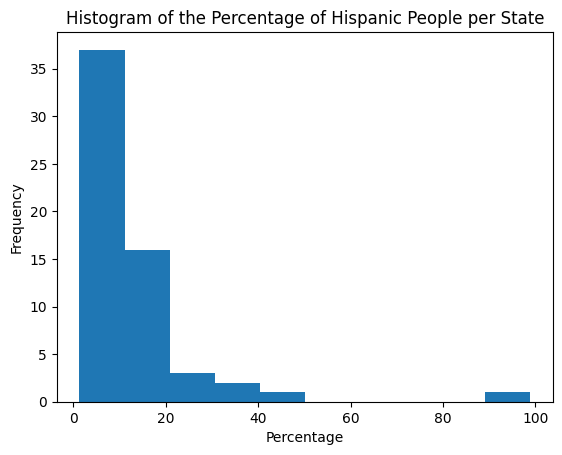

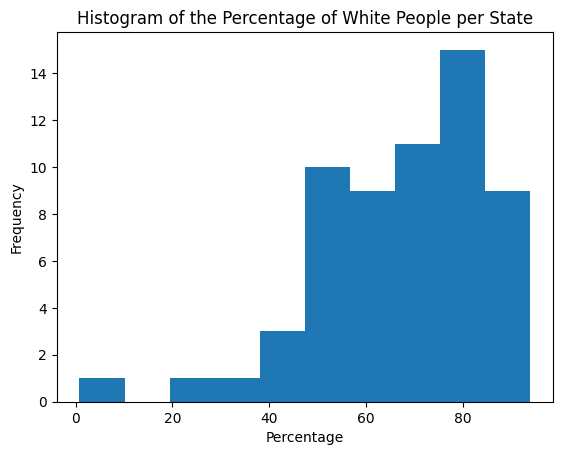

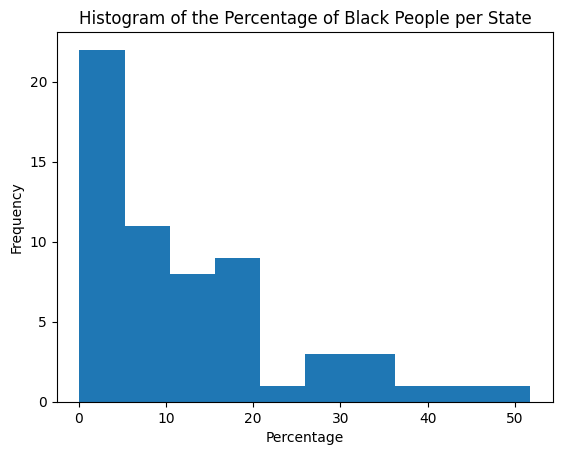

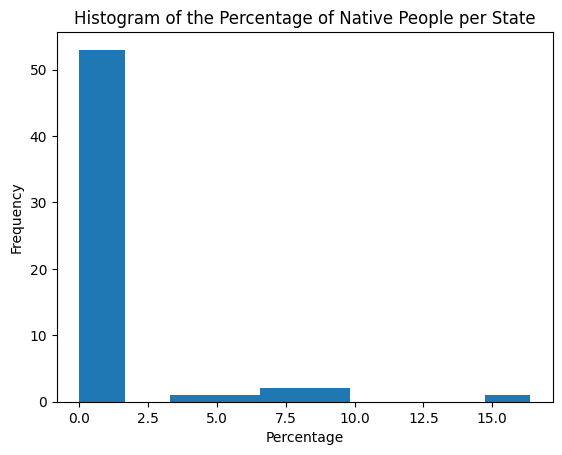

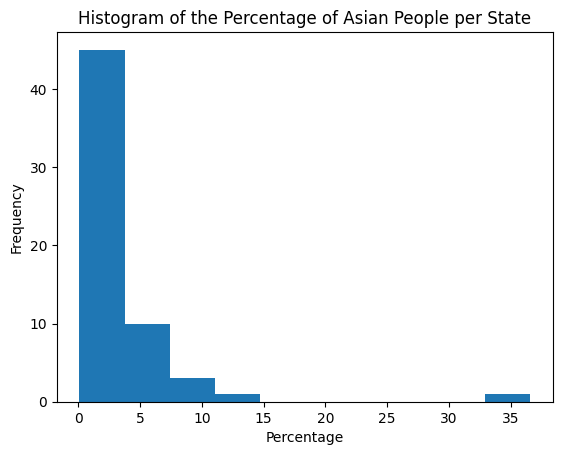

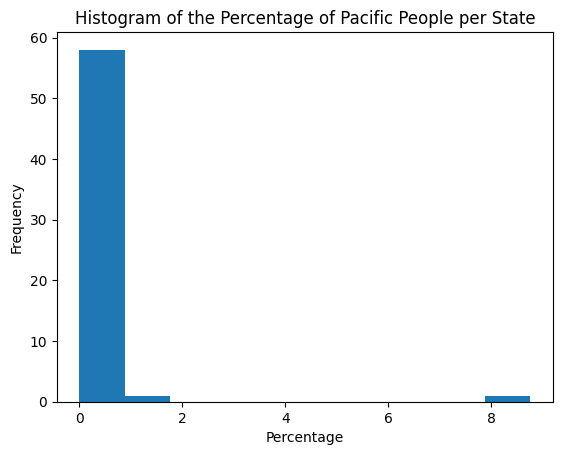

<Figure size 640x480 with 0 Axes>

In [196]:
#show plots 
for column in list_columns:
    plt.hist(census[column])
    plt.title("Histogram of the Percentage of {} People per State".format(column))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()